<a href="https://colab.research.google.com/github/hariseldon99/scientific-python-lectures/blob/master/Lecture-2-Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# matplotlib - 2D and 3D plotting in Python

J.R. Johansson (jrjohansson at gmail.com)

Modified by Analabha Roy (daneel@utexas.edu)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [2]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure.
%matplotlib inline
import numpy as np

In [3]:
# OPTIONAL: Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

To get started using Matplotlib in a Python program, import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [54]:
import matplotlib.pyplot as plt

# OPTIONAL: Set default figure size and font size
# For details on what this is, goto the last section of this notebook
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 30

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

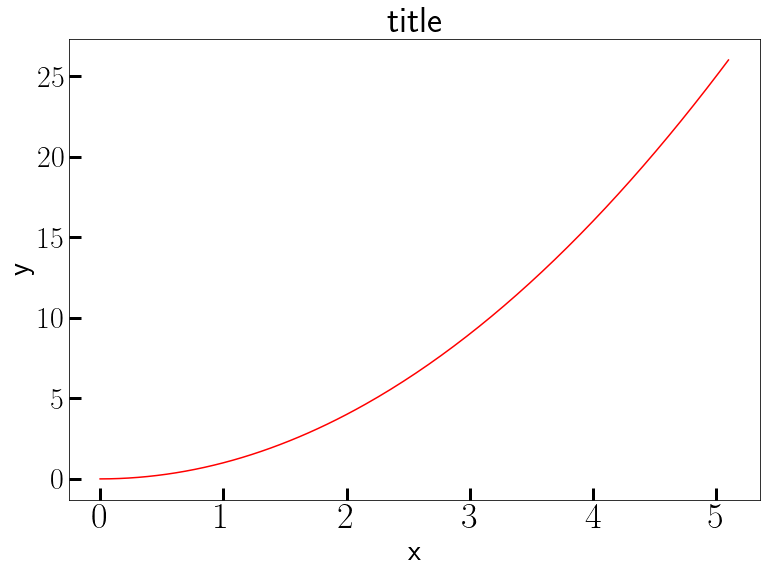

In [23]:
fig = plt.figure()

# Prepare the data
x = np.linspace(0.0, 5.1, 200)
y = x**2

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
plt.show()

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

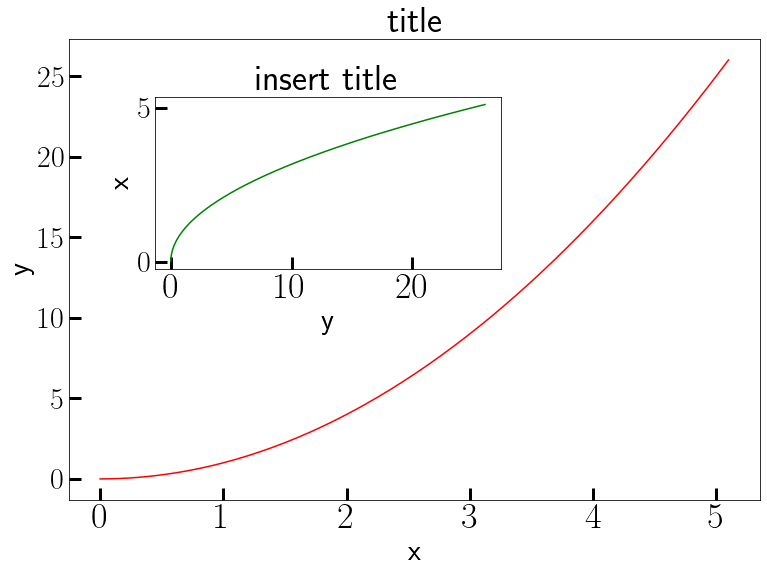

In [24]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');
plt.show()

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

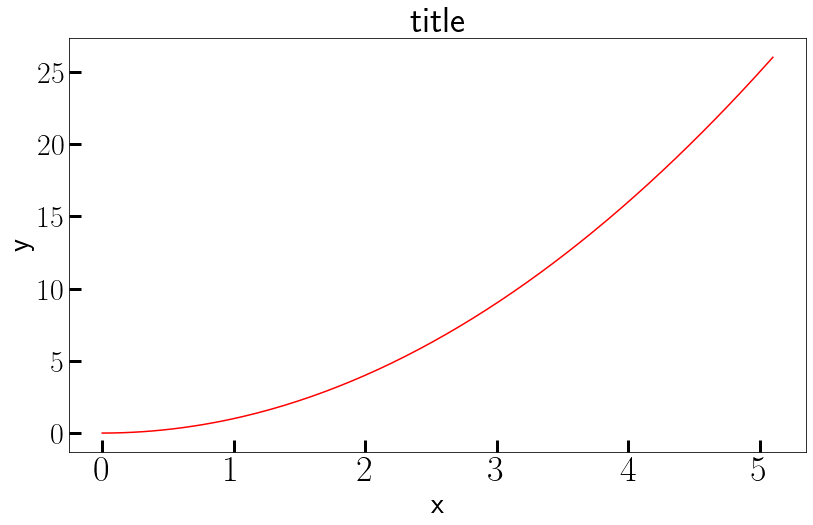

In [25]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
plt.show()

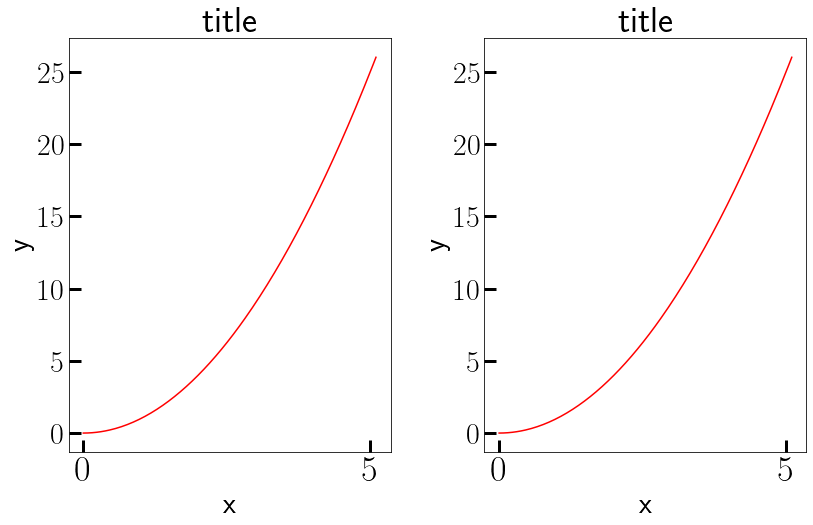

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout() # Just in case the axes overlap
plt.show()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [31]:
fig = plt.figure(figsize=(12,6), dpi=100)

<Figure size 1200x600 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

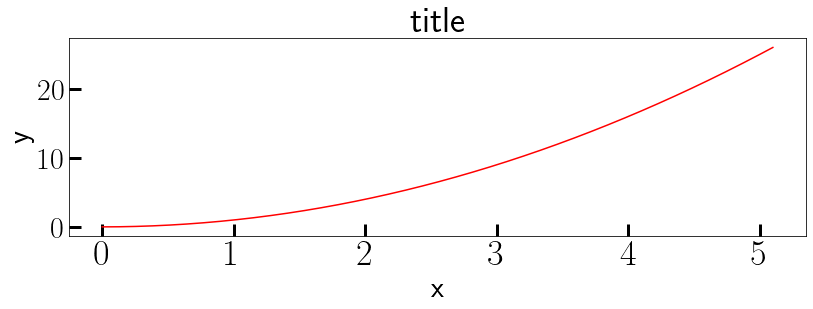

In [35]:
fig, axes = plt.subplots(figsize=(12,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
plt.show()

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [ ]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [ ]:
fig.savefig("filename.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [36]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [37]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added by using the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure:

In [38]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

If curves are added or removed from the figure, the legend is automatically updated accordingly.

The following figure shows how to use the figure title, axis labels and legends described above:

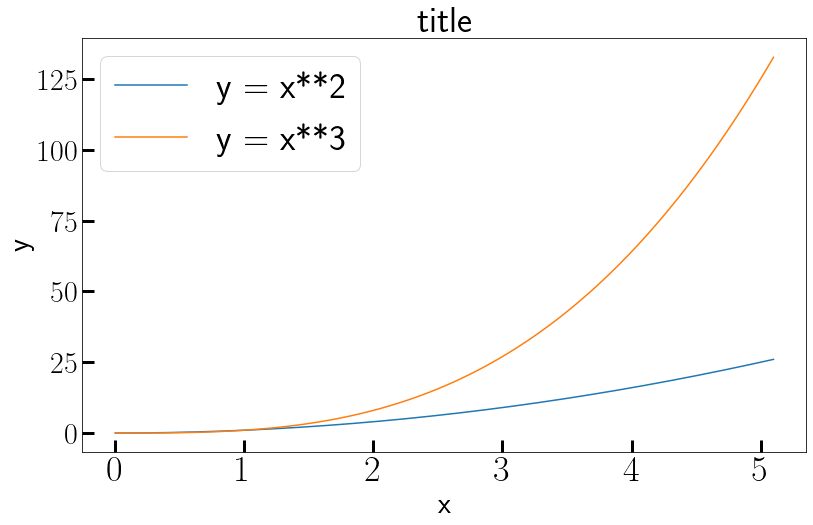

In [39]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');
ax.legend()
plt.show()

### Setting colors, linewidths, linetypes

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

In [40]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

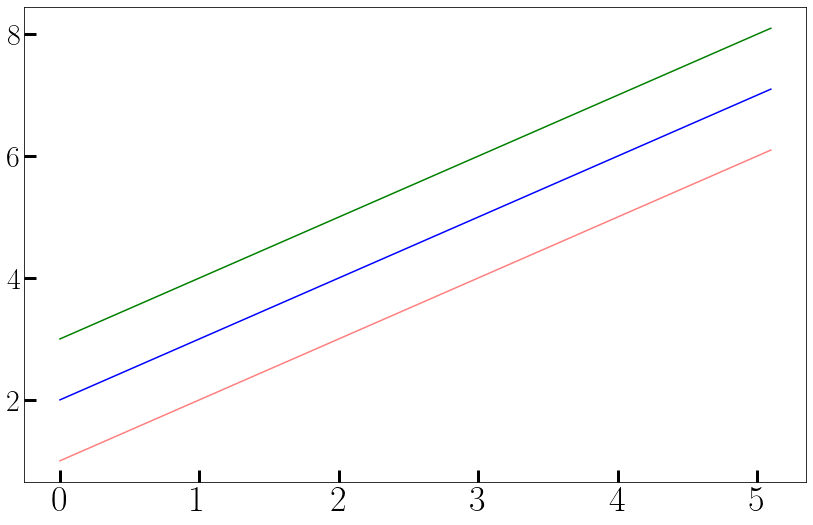

In [41]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="blue")       
ax.plot(x, x+3, color="green")
plt.show()

### Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

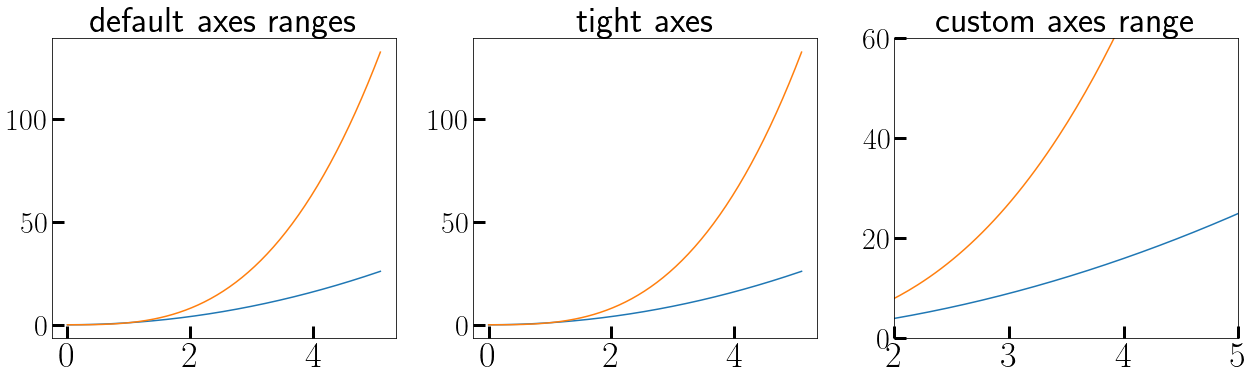

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");
plt.show()

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

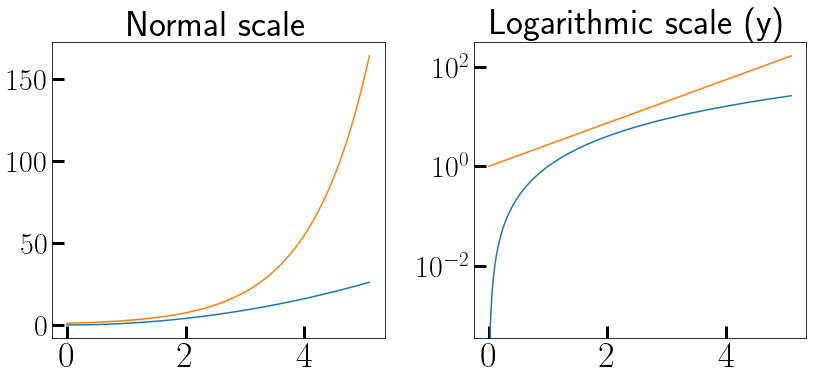

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");
plt.show()

#### Histogram

Here is the example from the `numpy` lecture again. based on your newfound knowledge of `matplotlib`, study this example and figure out how to plot data in histograms.

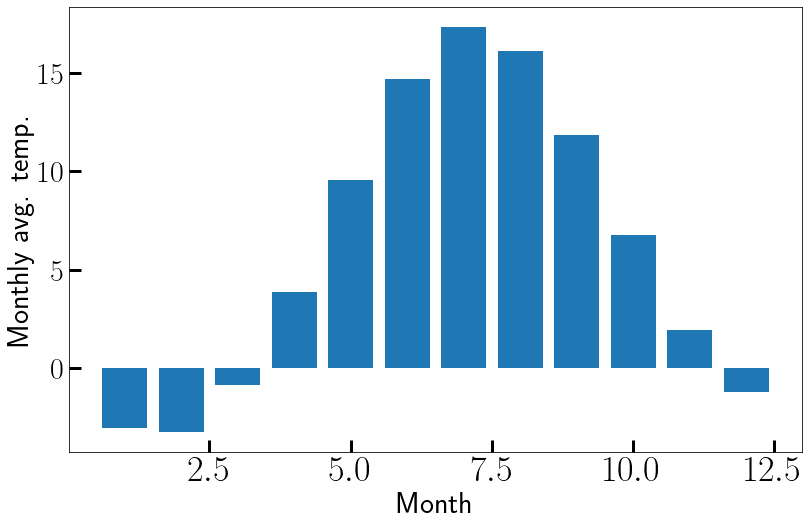

In [48]:
import numpy as np
data = np.genfromtxt('stockholm_td_adj.dat')

months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Matplotlib Runtime Configuration
You can customize matplotlib by changing the default settings in several ways. The simplest way is to set the so-called *Runtime Configuration Parameters*. All `rc` settings are stored in a dictionary-like variable called `matplotlib.rcParams`, which is global to the matplotlib package. These *rcParams* are best modified directly in your program as shown, for example, in the first cell of this notebook:

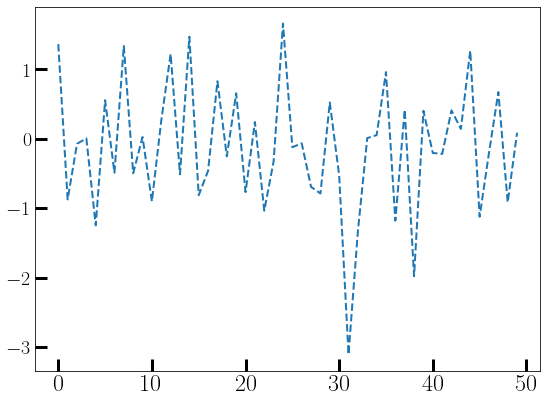

In [57]:
#Set default figure size and font size
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

data = np.random.randn(50)
plt.plot(data)
plt.show()

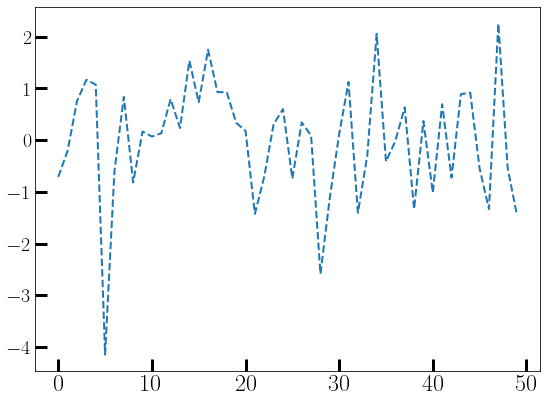

In [58]:
# This sets the default linewidth and linestyle
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

Run the command `help(plt.rcParams)` for a full list of configurable rcParams. Also, see the matplotlib manual page on [Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcasing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* https://scipy-lectures.org/intro/matplotlib/ - Another good matplotlib reference.
* https://computation.physics.utoronto.ca/tutorials/tutorial-part-5-numpy-scipy-and-matplotlib/ - Another good matplotlib tutorial.
* https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb - Robert Johansson's Matplotlib tutorial (on which this notebook is based)